**Exercice_1**

In [150]:
################################ Partie 1 : Configuration et Inspection des Données Météo ###############################################

1. Importation : Importez les bibliothèques pandas et numpy. 

In [151]:
import numpy as np 
import pandas as pd

2. Chargement : Chargez le fichier weather_data.csv dans un DataFrame 
nommé df_weather.

In [152]:
df_weather = pd.read_csv("weather_data.csv")

3. Exploration : 

In [153]:
df_weather.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0


4. Affichez les informations techniques du DataFrame (.info()) pour identifier 
les types de données et les valeurs non nulles. 

In [154]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8784 non-null   int64  
 1   TIME             8784 non-null   int64  
 2   TEMP             8784 non-null   int64  
 3   MIN_TEMP_GROUND  1464 non-null   float64
 4   PRESSURE         8784 non-null   int64  
 5   HUMIDITY         8784 non-null   int64  
 6   VIEW_RANGE       8743 non-null   float64
 7   CLOUD            8743 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
 13  WEATHER_CODE     3862 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 960.9 KB


 Affichez le nombre de valeurs manquantes par colonne :

In [155]:
df_weather.isna().sum()


YYYYMMDD              0
TIME                  0
TEMP                  0
MIN_TEMP_GROUND    7320
PRESSURE              0
HUMIDITY              0
VIEW_RANGE           41
CLOUD                41
MIST                 43
RAIN                 43
SNOW                 43
THUNDER              43
ICE                  43
WEATHER_CODE       4922
dtype: int64

In [156]:
#######################     Partie_2 : Traitement des Valeurs Manquantes (Missing Values) ################

1. proposez une stratégie pour la colonne MIN_TEMP_GROUND (ex: remplacer les NaN par la moyenne ou la médiane de la colonne).

In [157]:
df_weather["MIN_TEMP_GROUND"].fillna(
    df_weather["MIN_TEMP_GROUND"].median(),
    inplace=True
)

cols_binary = ["MIST", "RAIN", "SNOW", "THUNDER", "ICE", "CLOUD"]
df_weather[cols_binary] = df_weather[cols_binary].fillna(0)

df_weather["VIEW_RANGE"].fillna(
    df_weather["VIEW_RANGE"].median(),
    inplace=True
)

df_weather["WEATHER_CODE"].fillna("Unknown", inplace=True)


C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\1745149699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather["MIN_TEMP_GROUND"].fillna(
C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\1745149699.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

2. Vérifiez qu'il ne reste plus de valeurs manquantes dans cette colonne après traitement.

In [158]:
df_weather.isna().sum()


YYYYMMDD           0
TIME               0
TEMP               0
MIN_TEMP_GROUND    0
PRESSURE           0
HUMIDITY           0
VIEW_RANGE         0
CLOUD              0
MIST               0
RAIN               0
SNOW               0
THUNDER            0
ICE                0
WEATHER_CODE       0
dtype: int64

In [159]:
df_weather.to_csv("weather_data_cleaned.csv",index =False )

In [160]:
################  Partie 3 : Nettoyage du Jeu de Données "Athlètes" (Erreurs de Saisie) #################

1. . Chargez le fichier data/athletes.csv dans un DataFrame nommé athletes. Affichez 
ensuite les informations techniques du DataFrame (types des colonnes, utilisation 
mémoire et nombre de valeurs non-nulles) pour vérifier le bon chargement des 
données. » 

In [161]:
athletes = pd.read_csv("athletes.csv")
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11543 non-null  int64  
 1   nationality  11543 non-null  object 
 2   sex          11543 non-null  object 
 3   height       11213 non-null  float64
 4   weight       10884 non-null  float64
 5   sport        11543 non-null  object 
 6   gold         11543 non-null  object 
 7   silver       11543 non-null  object 
 8   bronze       11543 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 811.7+ KB


2. Affichez un nuage de points (scatter plot) croisant la taille (height) et le poids 
(weight) pour repérer visuellement les anomalies. 

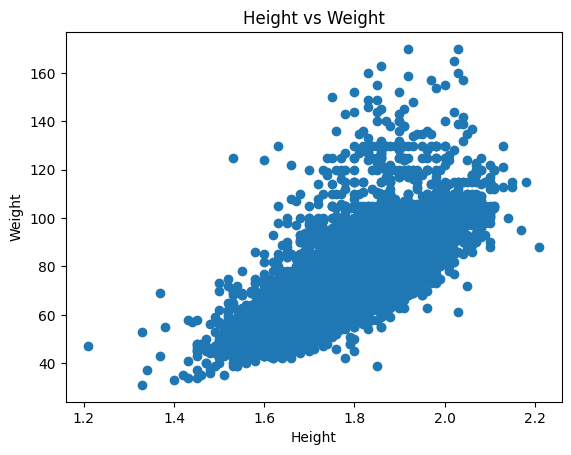

In [162]:
import matplotlib.pyplot as plt

plt.scatter(athletes["height"], athletes["weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()


3. Isolez la colonne height dans une variable nommée heights et affichez son diagramme en boîte (boxplot) pour visualiser la distribution et les valeurs 
extrêmes. 

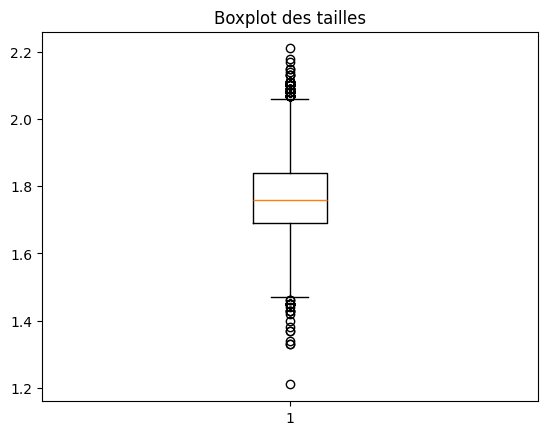

In [163]:
heights = athletes["height"]

plt.boxplot(heights.dropna())
plt.title("Boxplot des tailles")
plt.show()

4. Calcul des Bornes (Méthode IQR) :

In [164]:
Q1 = heights.quantile(0.25)
Q3 = heights.quantile(0.75)
IQR = Q3 - Q1

pmin = Q1 - 1.5 * IQR
pmax = Q3 + 1.5 * IQR


5. Utilisez la méthode .where() pour créer une nouvelle série new_heights où les valeurs situées en dehors des bornes [pmin, pmax] sont remplacées par NaN. 

In [165]:
new_heights = heights.where((heights >= pmin) & (heights <= pmax))

6. Créez un DataFrame de comparaison (compare) contenant la colonne originale ("before") et la colonne filtrée ("after"). 

In [166]:
compare = pd.DataFrame({
    "before": heights,
    "after": new_heights
})

7. Affichez les statistiques descriptives (.describe()) et les boxplots de ce DataFrame de comparaison pour valider le nettoyage. 

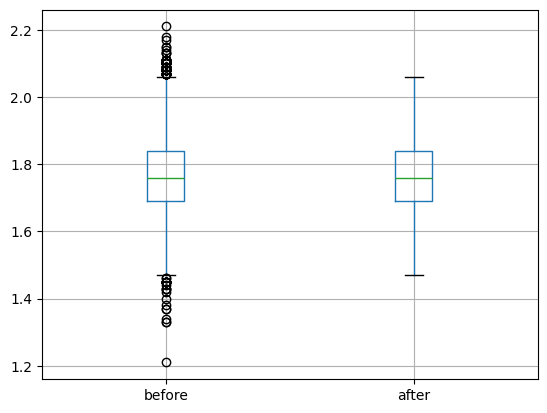

In [167]:
compare.describe()
compare.boxplot()
plt.show()


8. Appliquez le filtrage directement sur la série originale heights (paramètre inplace=True).

In [168]:
athletes["height"] = athletes["height"].where(
    (athletes["height"] >= pmin) & (athletes["height"] <= pmax)
)

9. Générez à nouveau le nuage de points height vs weight pour confirmer la disparition des anomalies visuelles. 

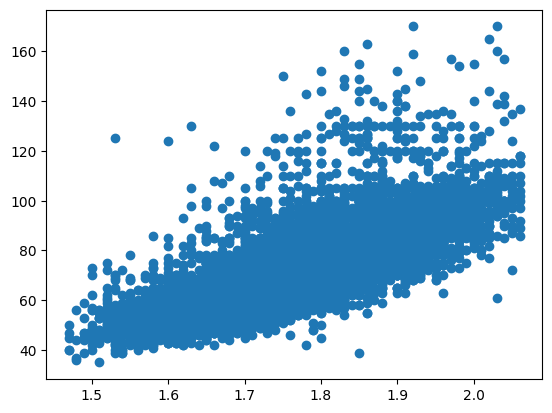

In [169]:
plt.scatter(athletes["height"], athletes["weight"])
plt.show()

10. Détection : Vérifiez s'il existe des lignes dupliquées dans le DataFrame athletes (affichez True ou False). Si oui, affichez ces lignes pour les inspecter. 

In [170]:
athletes.duplicated().any()

np.True_

11. Nettoyage : Supprimez les doublons directement dans le DataFrame 
(inplace=True) et vérifiez ensuite que l'opération a bien fonctionné. 

In [171]:
athletes.drop_duplicates(inplace=True)
athletes.duplicated().any()

np.False_

12. Exploration des Catégories : Affichez la liste des nationalités uniques présentes 
dans le jeu de données, triées par ordre alphabétique, puis affichez le nombre 
d'athlètes par nationalité (value_counts).

In [172]:
sorted(athletes["nationality"].unique())
athletes["nationality"].value_counts()

nationality
USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
MTN      2
SWZ      2
BHU      2
DMA      2
TUV      1
Name: count, Length: 207, dtype: int64

13. Le Problème : Tentez d'afficher la somme de la colonne bronze. Question d'analyse 
: Pourquoi le résultat ressemble-t-il à une concaténation de texte interminable au 
lieu d'un chiffre unique ?

In [173]:
athletes["bronze"].sum()

'001000100000000000000000000000000000000000000000000000010100000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000100000000001001000000000000000000000000000010000000000000000000000000000000100000000000000010000000000000000000000000010000000000000000000000000011000000010000000000000000000000100000000000000000010010000000000100000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000000000000000000000010000100000000000101100010001000000100000000000000000000000000000000010000000000000000000000000000001000000000010000000000000010000001000000000000000000000000000110000000000000101000000000000000000000000000000000000000100000000002000000000100000000000000000000000000000000100100001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000100000000000000000000001000011000010000000001000000010100010000010000010001000000000

14. L'Investigation : Essayez de convertir la colonne bronze en entier (int). Lisez 
l'erreur retournée pour identifier le caractère problématique. Cherchez ensuite la 
ou les lignes où la colonne bronze est égale à la lettre 'O'.

In [174]:
for col in ["gold", "silver", "bronze"]:
    print(col)
    print(athletes[athletes[col] == "O"][col].index.tolist())

medal_cols = ["gold", "silver", "bronze"]

athletes[medal_cols] = athletes[medal_cols].replace("O", 0)
athletes[medal_cols].apply(pd.unique)
athletes[medal_cols] = athletes[medal_cols].astype(int)
athletes.info()
athletes[medal_cols].sum()


gold
[7521]
silver
[7521]
bronze
[7521]
<class 'pandas.core.frame.DataFrame'>
Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  int64  
 7   silver       11538 non-null  int64  
 8   bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 901.4+ KB


gold      666
silver    655
bronze    704
dtype: int64

15. Utilisez .loc pour corriger la valeur de l'index identifié (7521) en remplaçant le 'O' 
par un 0 numérique.

In [175]:
athletes.loc[7521, "bronze"] = 0

16. Convertissez les trois colonnes de médailles (gold, silver, bronze) en entiers (int). 

In [176]:
athletes[["gold", "silver", "bronze"]] = athletes[
    ["gold", "silver", "bronze"]
].astype(int)

17. Validation : Affichez à nouveau les informations techniques du DataFrame (.info()) 
et calculez la somme réelle des médailles pour vérifier que tout est rentré dans 
l'ordre.

In [177]:
athletes.info()
athletes[["gold", "silver", "bronze"]].sum()

<class 'pandas.core.frame.DataFrame'>
Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  int64  
 7   silver       11538 non-null  int64  
 8   bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


gold      666
silver    655
bronze    704
dtype: int64

In [178]:
athletes.to_csv("athletes_data_cleaned.csv",index =False )

**Exercice_2**

1. Charger le dataset landslides.csv et identifiez toutes les colonnes qui contiennent des valeurs manquantes (NaN). Pour chaque colonne, indiquez le nombre de 
valeurs manquantes. 

In [179]:
landslides = pd.read_csv("landslides.csv")
landslides.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

2. Calculez le pourcentage de valeurs manquantes pour chaque colonne. Quelle 
colonne a le pourcentage le plus élevé ? 

In [180]:
(landslides.isna().mean() * 100).sort_values(ascending=False)

time              62.847017
fatalities        14.589486
date               0.177200
trigger            0.118133
landslide_type     0.059067
state/province     0.059067
id                 0.000000
country_name       0.000000
population         0.000000
dtype: float64

3. Quel est le nombre total de cellules manquantes dans tout le dataset ? Exprimez-le 
aussi en pourcentage du total des cellules. 

In [181]:
total_missing = landslides.isna().sum().sum()
percent_missing = total_missing / landslides.size * 100

4. La colonne 'time' contient 906 valeurs manquantes (53.55%). Proposez un 
traitement et justifiez votre choix. 

In [182]:
landslides.drop(columns=["time"], inplace=True)

5. La colonne 'fatalities' contient 1013 valeurs manquantes (59.88%). Comment 
allez-vous traiter ces valeurs manquantes ? Justifiez votre choix.

In [183]:
landslides["fatalities"].fillna(0, inplace=True)

C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\4165675047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  landslides["fatalities"].fillna(0, inplace=True)


6. La colonne 'trigger' a 290 valeurs manquantes (17.16%). Quel est le mode (valeur 
la plus fréquente) de cette colonne ? Utilisez-le pour imputer les valeurs 
manquantes. 

In [184]:
mode_trigger = landslides["trigger"].mode()[0]
mode_trigger
landslides["trigger"].fillna(mode_trigger, inplace=True)

C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\3767377956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  landslides["trigger"].fillna(mode_trigger, inplace=True)


7. La colonne 'landslide_type' a 11 valeurs manquantes (0.65%). Proposez deux 
approches différentes et comparez-les.

In [185]:
df_drop = landslides.dropna(subset=["landslide_type"])
landslides["landslide_type"].fillna("Unknown", inplace=True)

C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\1895655214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  landslides["landslide_type"].fillna("Unknown", inplace=True)


8. La colonne 'date' est actuellement au format texte (ex: '3/2/07'). Convertissez-la au 
format datetime pandas (ex: '3-2-07'). et vérifiez le résultat.

In [186]:
landslides["date"] = pd.to_datetime(
    landslides["date"],
    errors="coerce",
    infer_datetime_format=True
)

C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\3452752303.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  landslides["date"] = pd.to_datetime(
C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\3452752303.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landslides["date"] = pd.to_datetime(


9. À partir de la colonne 'date' convertie, créez une nouvelle colonne 'month' qui 
contient uniquement le numéro du mois (1-12).

In [187]:
landslides["month"] = landslides["date"].dt.month

10. Récapitulez les trois approches et leurs effets sur le dataset : 
• Suppression des lignes (dropna) 
• Imputation par valeur centrale (médiane, mode) 
• Remplacement par catégorie spéciale ('Unknown')

In [188]:
df1 = landslides.dropna()
df1.shape
df2 = landslides.copy()
df2["fatalities"].fillna(0, inplace=True)
df2["trigger"].fillna(df2["trigger"].mode()[0], inplace=True)
df2.shape
df3 = landslides.copy()
df3["landslide_type"].fillna("Unknown", inplace=True)
df3.shape

C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\3483940777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["fatalities"].fillna(0, inplace=True)
C:\Users\boudk\AppData\Local\Temp\ipykernel_35732\3483940777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

(1693, 9)

11. Écrivez du code pour vérifier que le nettoyage a été effectué correctement.

In [189]:
landslides.isna().sum()

id                0
date              3
country_name      0
state/province    1
population        0
landslide_type    0
trigger           0
fatalities        0
month             3
dtype: int64

12. Vous allez utiliser ce dataset pour entraîner un modèle de machine learning. 
Expliquez comment le choix de traitement des valeurs manquantes affectera la 
performance du modèle.

13. Récupérez uniquement la valeur du mois et créez-la comme nouvelle colonne.

In [190]:
landslides["month"] = landslides["date"].dt.month

In [191]:
landslides.to_csv("landslides_data_cleaned.csv",index =False )

14. Créez deux graphiques montrant le nombre de glissements de terrain pour chaque 
mois (1-12). Utilisez matplotlib et seaborn. 

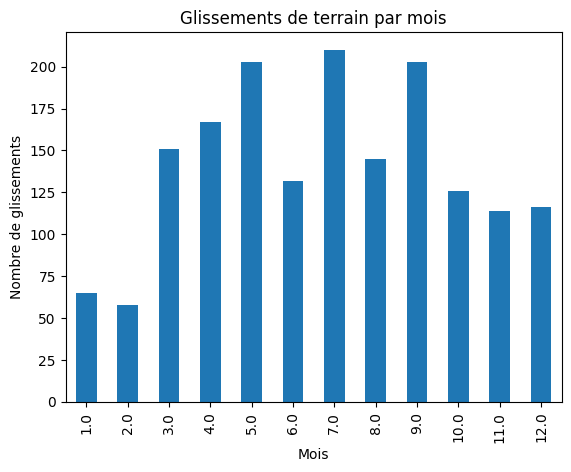

In [192]:
import matplotlib.pyplot as plt

landslides["month"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel("Nombre de glissements")
plt.title("Glissements de terrain par mois")
plt.show()

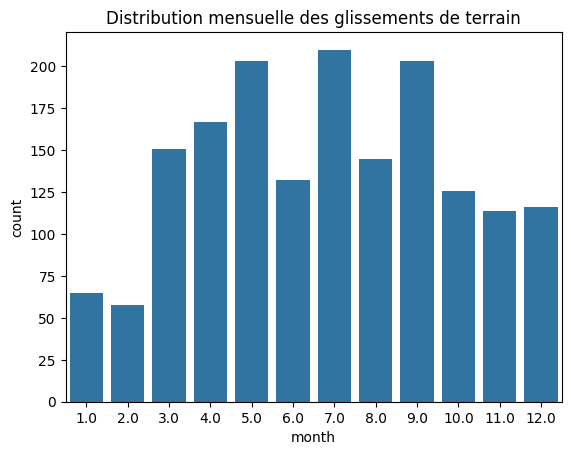

In [193]:
import seaborn as sns

sns.countplot(x="month", data=landslides)
plt.title("Distribution mensuelle des glissements de terrain")
plt.show()